**INTRODUCTION** 

* Question: 

What variables are indicators of the best quality red wine, and how do these factors affect the quality of the wine?

* Background Information: 

Red wine has always been popular in social settings, but it is typically expensive as a luxury good, and the price is heavily based on the wine's quality. Product quality certification is a marketing tool used by red wine vendors to justify their pricing. However, the procedure for wine quality is impossible to evaluate objectively because it often only considers the subjective sensory perceptions of human specialists. Moreover, prices differ in ways that are unfair to consumers as a result of the highly variable quality assessment. 

However, laboratory-based physicochemical testing that takes into account chemical properties is a crucial component of wine certification. ((Nemzer et al. 2021) If sensory evaluations can be coupled with scientific characterizations, there can be greater control over the quality evaluation procedure and better results capturing the inherent subjectivity.

* Dataset: 

https://archive.ics.uci.edu/ml/datasets/wine+quality

The wine quality dataset we will be using is related to red variants of the Portuguese "Vinho Verde" wine. This dataset contains a total of 12 variables including physicochemical (inputs) and sensory (output) variables, with 1,599 recorded observations. The input variables are based on the chemical component analysis of red wine, including measurements such as acidity, residual sugar, density, pH, alcohol, sulfur dioxide, and chlorides. The quality of the red wine is represented with a score between 0 and 10 based on the sensory output. 

We chose to use 5 predictors: fixed acidity, residual sugar, density, pH, and alcohol. We chose these predictors because they were variables which we thought would have a noticable impact on wine quality, and are also easily understandable unlike some obscure measurements present in the dataset.



**METHODS**

The quality of a given observation of red wine will be classified with 5 predictors: fixed acidity, residual sugar, density, pH, and alcohol. First, the parameters will be standarized to make values consistent. The relationships between various predictors and the quality of the red wine will be visualized using scatterplots. Then, the k value with the highest accuracy will be calculated. Based on the calculated value, the wine quality will be trained using the chosen parameters so that wine quality can be determined using fixed acidity, residual sugar, density, pH, and alcohol. 


In [74]:
# importing required libraries
library(repr)
library(readr)
library(GGally)
library(ggplot2)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
install.packages("ggcorrplot")
library(ggcorrplot)

# setting seed
set.seed(1000)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



1. Demonstrate that the dataset can be read from the web into R.

In [56]:
# reading data from web to web_data
web_data <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# reading web_data to redwine_data with spaces removed from columns and "quality" set as factor
redwine_data <- read_delim(web_data) |>
    rename(fixed_acidity = `fixed acidity`, 
          volatile_acidity = `volatile acidity`,
          citric_acid = `citric acid`,
          residual_sugar = `residual sugar`,
          free_sulfur_dioxide = `free sulfur dioxide`,
          total_sulfur_dioxide = `total sulfur dioxide`) |>
    mutate(quality = as_factor(quality))

# displaying data
redwine_data

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7


2. Clean and wrangle your data into a tidy format.

In [57]:
# creating training and testing sets with a 75% proportion of training data and strata set to quality
redwine_split <- initial_split(redwine_data, prop = .75, strata = quality)
    redwine_train <- training(redwine_split)
    redwine_test <- testing(redwine_split)

# selecting our 5 predictors
redwine_train <- redwine_train |>
    select(fixed_acidity, residual_sugar, density, pH, alcohol, quality)
redwine_train

fixed_acidity,residual_sugar,density,pH,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,1.9,0.9978,3.51,9.4,5
7.8,2.6,0.9968,3.20,9.8,5
7.8,2.3,0.9970,3.26,9.8,5
7.4,1.9,0.9978,3.51,9.4,5
7.4,1.8,0.9978,3.51,9.4,5
7.9,1.6,0.9964,3.30,9.4,5
7.5,6.1,0.9978,3.35,10.5,5
6.7,1.8,0.9959,3.28,9.2,5
7.5,6.1,0.9978,3.35,10.5,5


3. Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 


In [58]:
# mapping 'mean' function to every column and displaying result
redwine_train_mean <- map_df(redwine_train, mean)
redwine_train_mean

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


fixed_acidity,residual_sugar,density,pH,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.330467,2.558973,0.9968078,3.311886,10.41457,NA


Since our data already has an equal amount of observations in each class, we decided to use create a table to show the mean of each column. This will help us understand the average values we are working with, what to expect, and what would be an extreme value or outlier.

4. Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


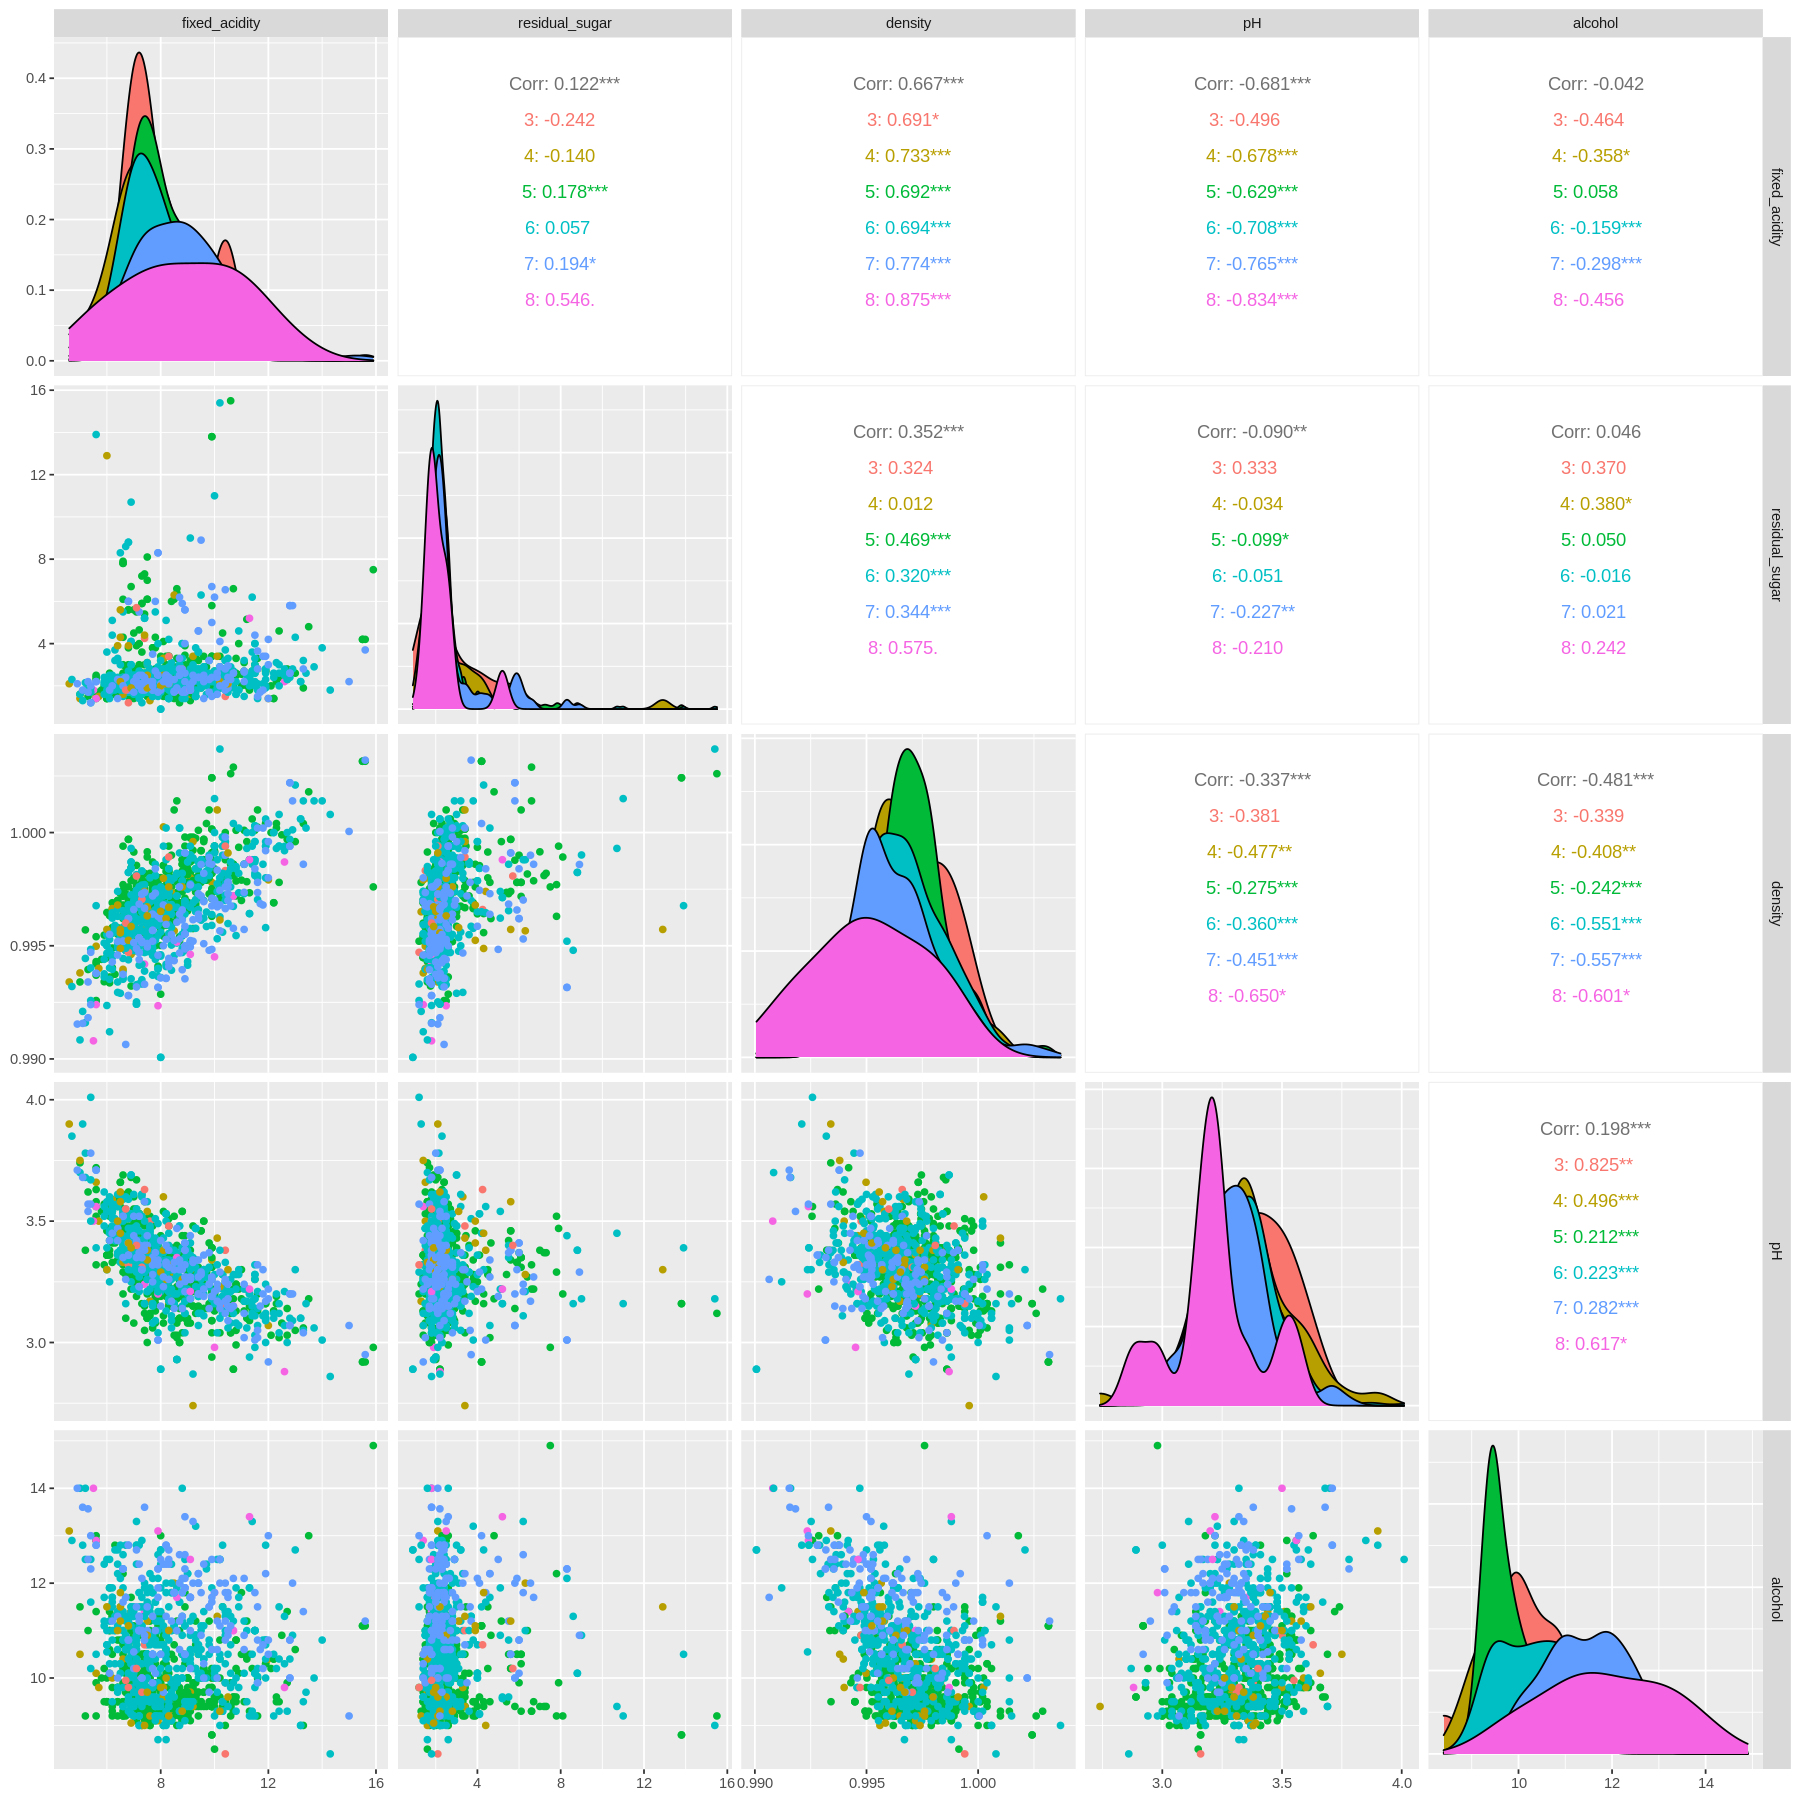

In [68]:
# creating pair plot from redwine_training_data with columns selected appropriately and colour set as our factor (quality) 
options(repr.plot.width = 15, repr.plot.height = 15) 
redwine_plot <- ggpairs(redwine_train, columns = 1:5, aes(colour=quality))

# displaying plot
redwine_plot

The pairplot above is separated into 3 sections. 

Everything is colored to represent our factor of quality, as follows: 
* Orange: Quality = 3
* Yellow: Quality = 4
* Green: Quality = 5
* Light Blue: Quality = 6
* Dark Blue: Quality = 7
* Magenta: Quality = 8

First, the 10 plots in the bottom left show a scatterplot comparison between every combination of our 5 predictors. This is an easy way for us to visualize which combinations of predictors show correlations, all at the same time.

Second, the 10 lists of values in the top right show the Pearson correlation value for every combination of our 5 predictors. This value is a number from -1 (negative, linear) to 1 (positive, linear), representing the strength of a linear correlation, where -1 and 1 are strongest and 0 is weakest.

Finally, the 5 distributions on the middle diagonal show the correlation value for each individual predictor at each value of quality. For example, in the distribution in the very bottom right, green (quality = 5) has a very high correlation with alcohol when alcohol is around 9, and magenta's (quality = 8) highest correlation is when alcohol is around 12. This means that a prediction classifying an observation with alcohol level 9 as quality 5 would very likely be accurate. Furthermore, a prediction classifying an observation with alcohol level 12 as quality 8 would be significantly less accurate, while still being more accurate than a prediction classifying an observation with alcohol level 9 as quality 8.

* Data analysis

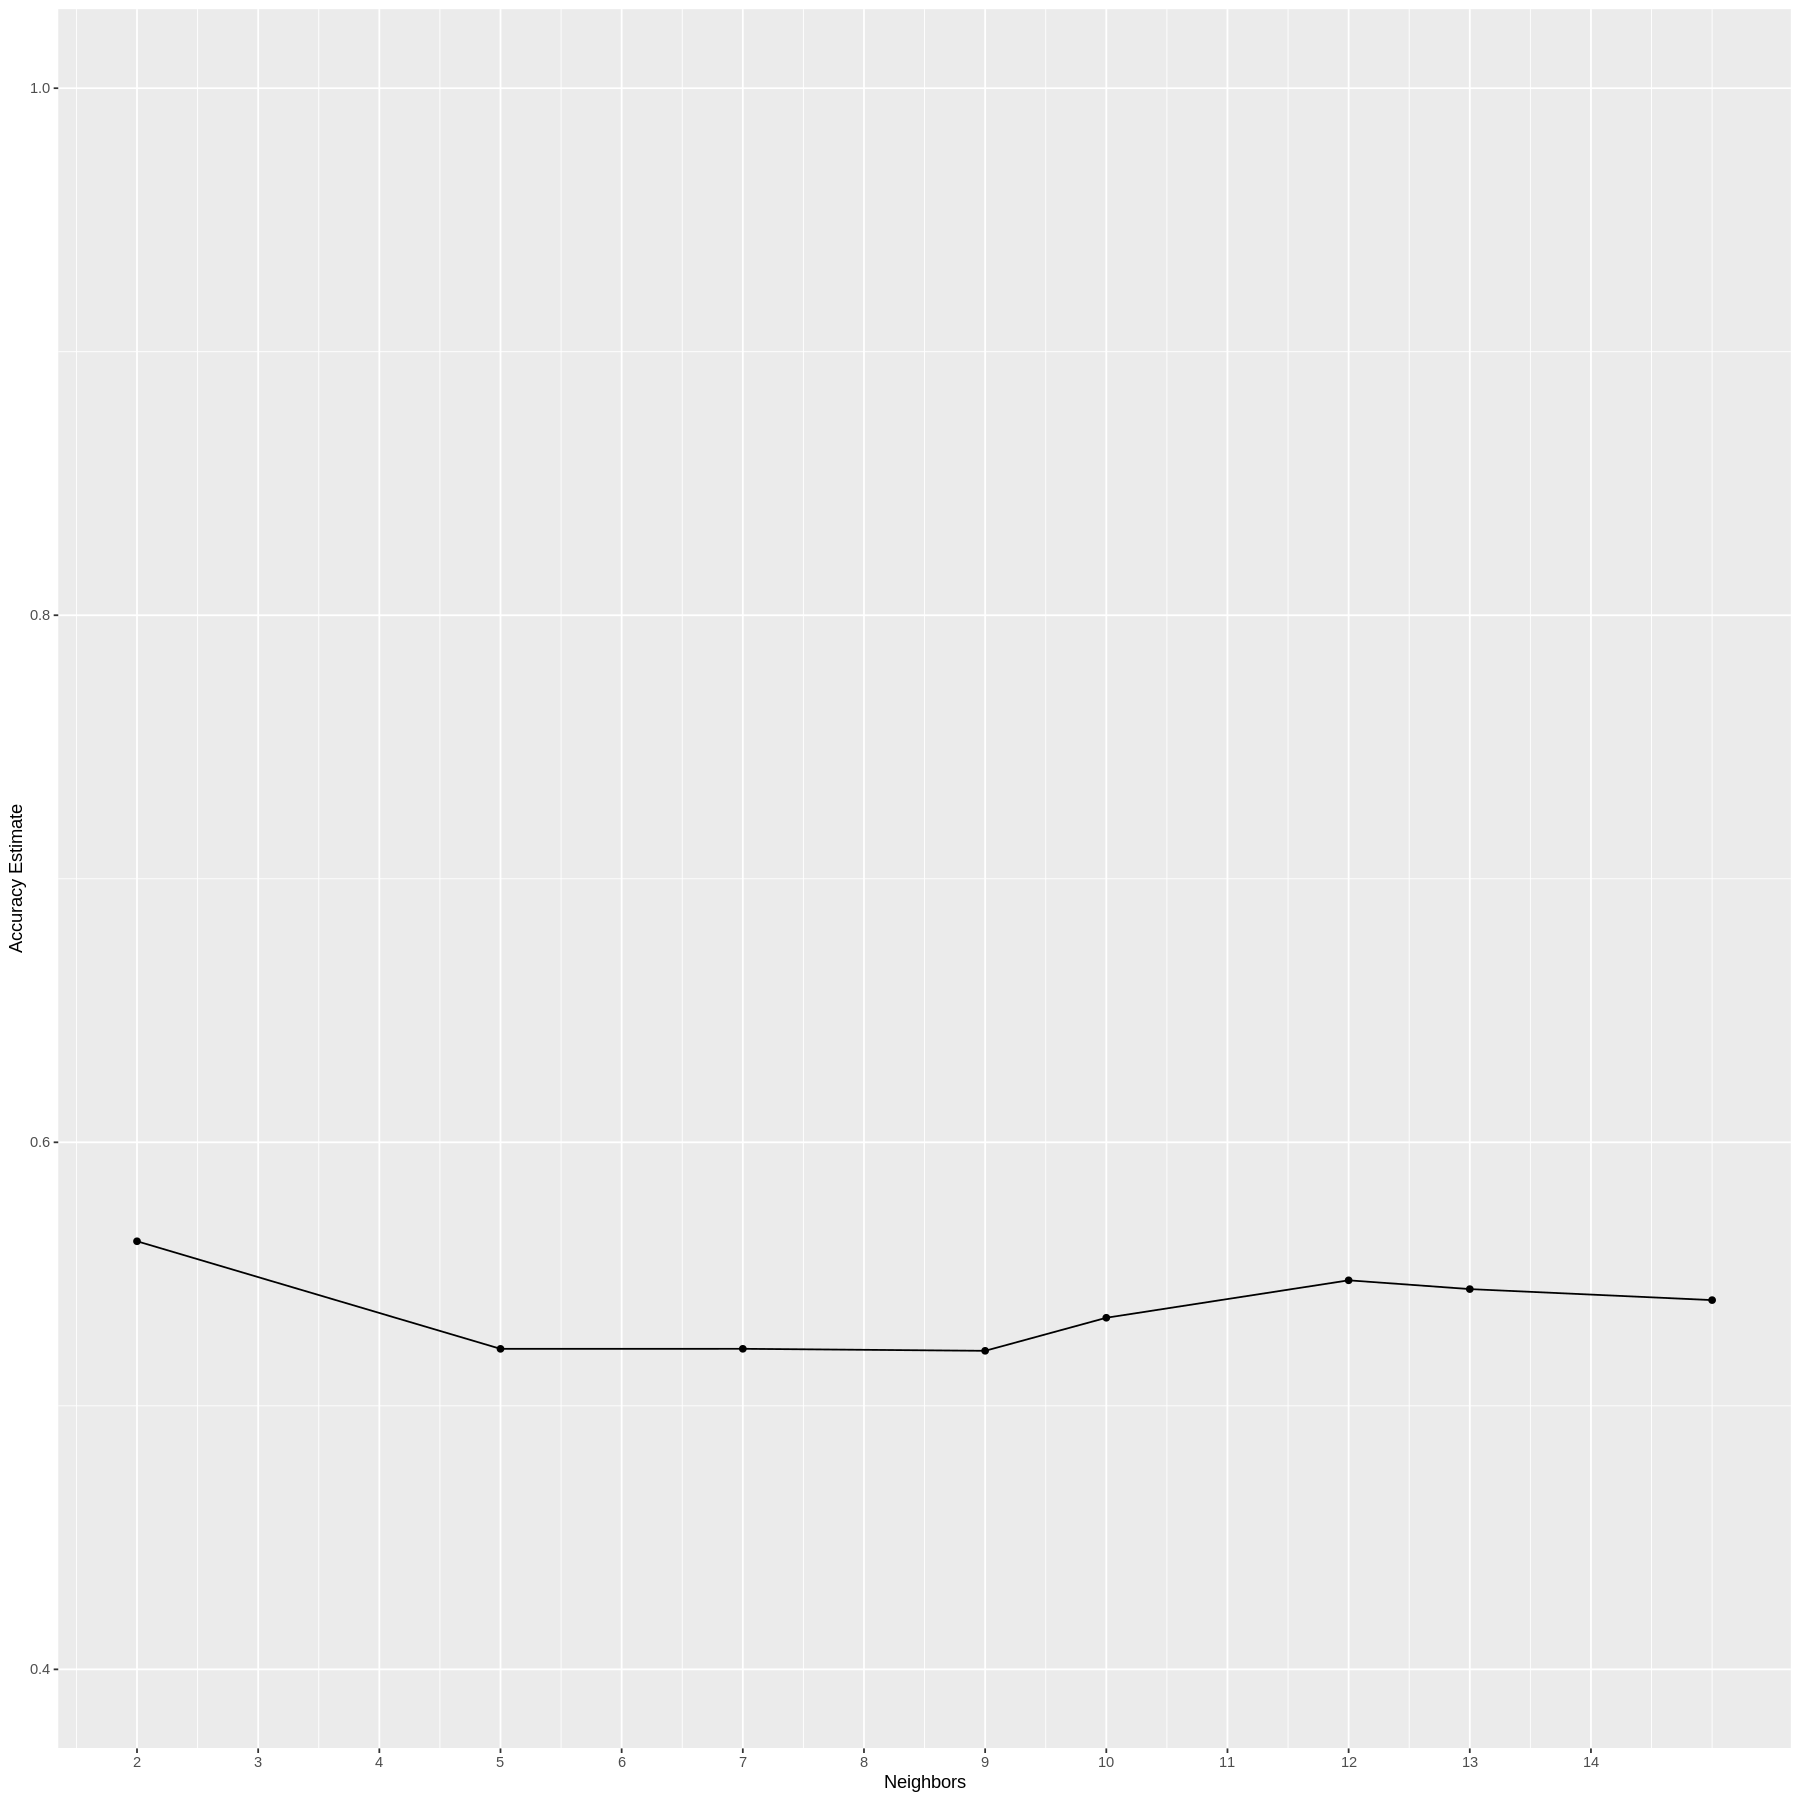

In [60]:
set.seed(1000)

# creating recipe where quality is predicted from our 5 predictors, with all predictors standardized
redwine_recipe <- recipe(quality ~., data = redwine_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# performing cross validation
redwine_vfold <- vfold_cv(redwine_train, v=5, strata = quality)

# determining best K value for model
redwine_knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

redwine_knn_results <- workflow() |>
    add_recipe(redwine_recipe) |>
    add_model(redwine_knn_tune) |>
    tune_grid(resamples = redwine_vfold, grid = 10) |>
    collect_metrics()

redwine_accuracies <- redwine_knn_results |>
    filter(.metric=="accuracy")

cross_val_plot <- ggplot(redwine_accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 14, by = 1)) +
    scale_y_continuous(limits = c(0.4, 1.0)) 

# display plot with K values against their accuracies
cross_val_plot

Based on this plot, we chose to use 12 neighbors for our KNN classification, because it has a relatively high accuracy with small variation between adjacent values.  

In [65]:
set.seed(1000)

# creating knn model with chosen neighbour amount of 12
redwine_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |>
  set_engine("kknn") |>
  set_mode("classification")

redwine_fit <- workflow() |>
  add_recipe(redwine_recipe) |>
  add_model(redwine_knn) |>
  fit(data = redwine_train)

# getting the prediction column
redwine_predictions <- predict(redwine_fit, redwine_test) |> 
    bind_cols(redwine_test)

# comparing predictions to real values to determine accuracy of model
redwine_accuracy <- redwine_predictions |> 
    metrics(truth = quality, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

# creating confusion matrix
redwine_cm <- redwine_predictions |> 
    conf_mat(truth = quality, estimate = .pred_class)

redwine_accuracy
redwine_cm

.metric,.estimate
<chr>,<dbl>
accuracy,0.5835411


          Truth
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   1   0   0   0
         5   1   5 130  63   2   0
         6   0   6  37  84  29   2
         7   0   0   3  14  20   4
         8   0   0   0   0   0   0

Since our accuracy metrics were unexpectedly low, we decided to attempt the classification again, but with all 11 predictors. There was no significant difference between the two, so we are continuing with the original 5 predictors.

Accuracy with initial 5 predictors, 12 neighbors:
* 58.35%

Accuracy with initial 5 predcitors, 2 neighbors: 
* 60.10%

Accuracy with all 11 predictors, 12 neighbors: 
* 58.10%

Accuracy with all 11 predictors, 2 neighbors: 
* 62.59%


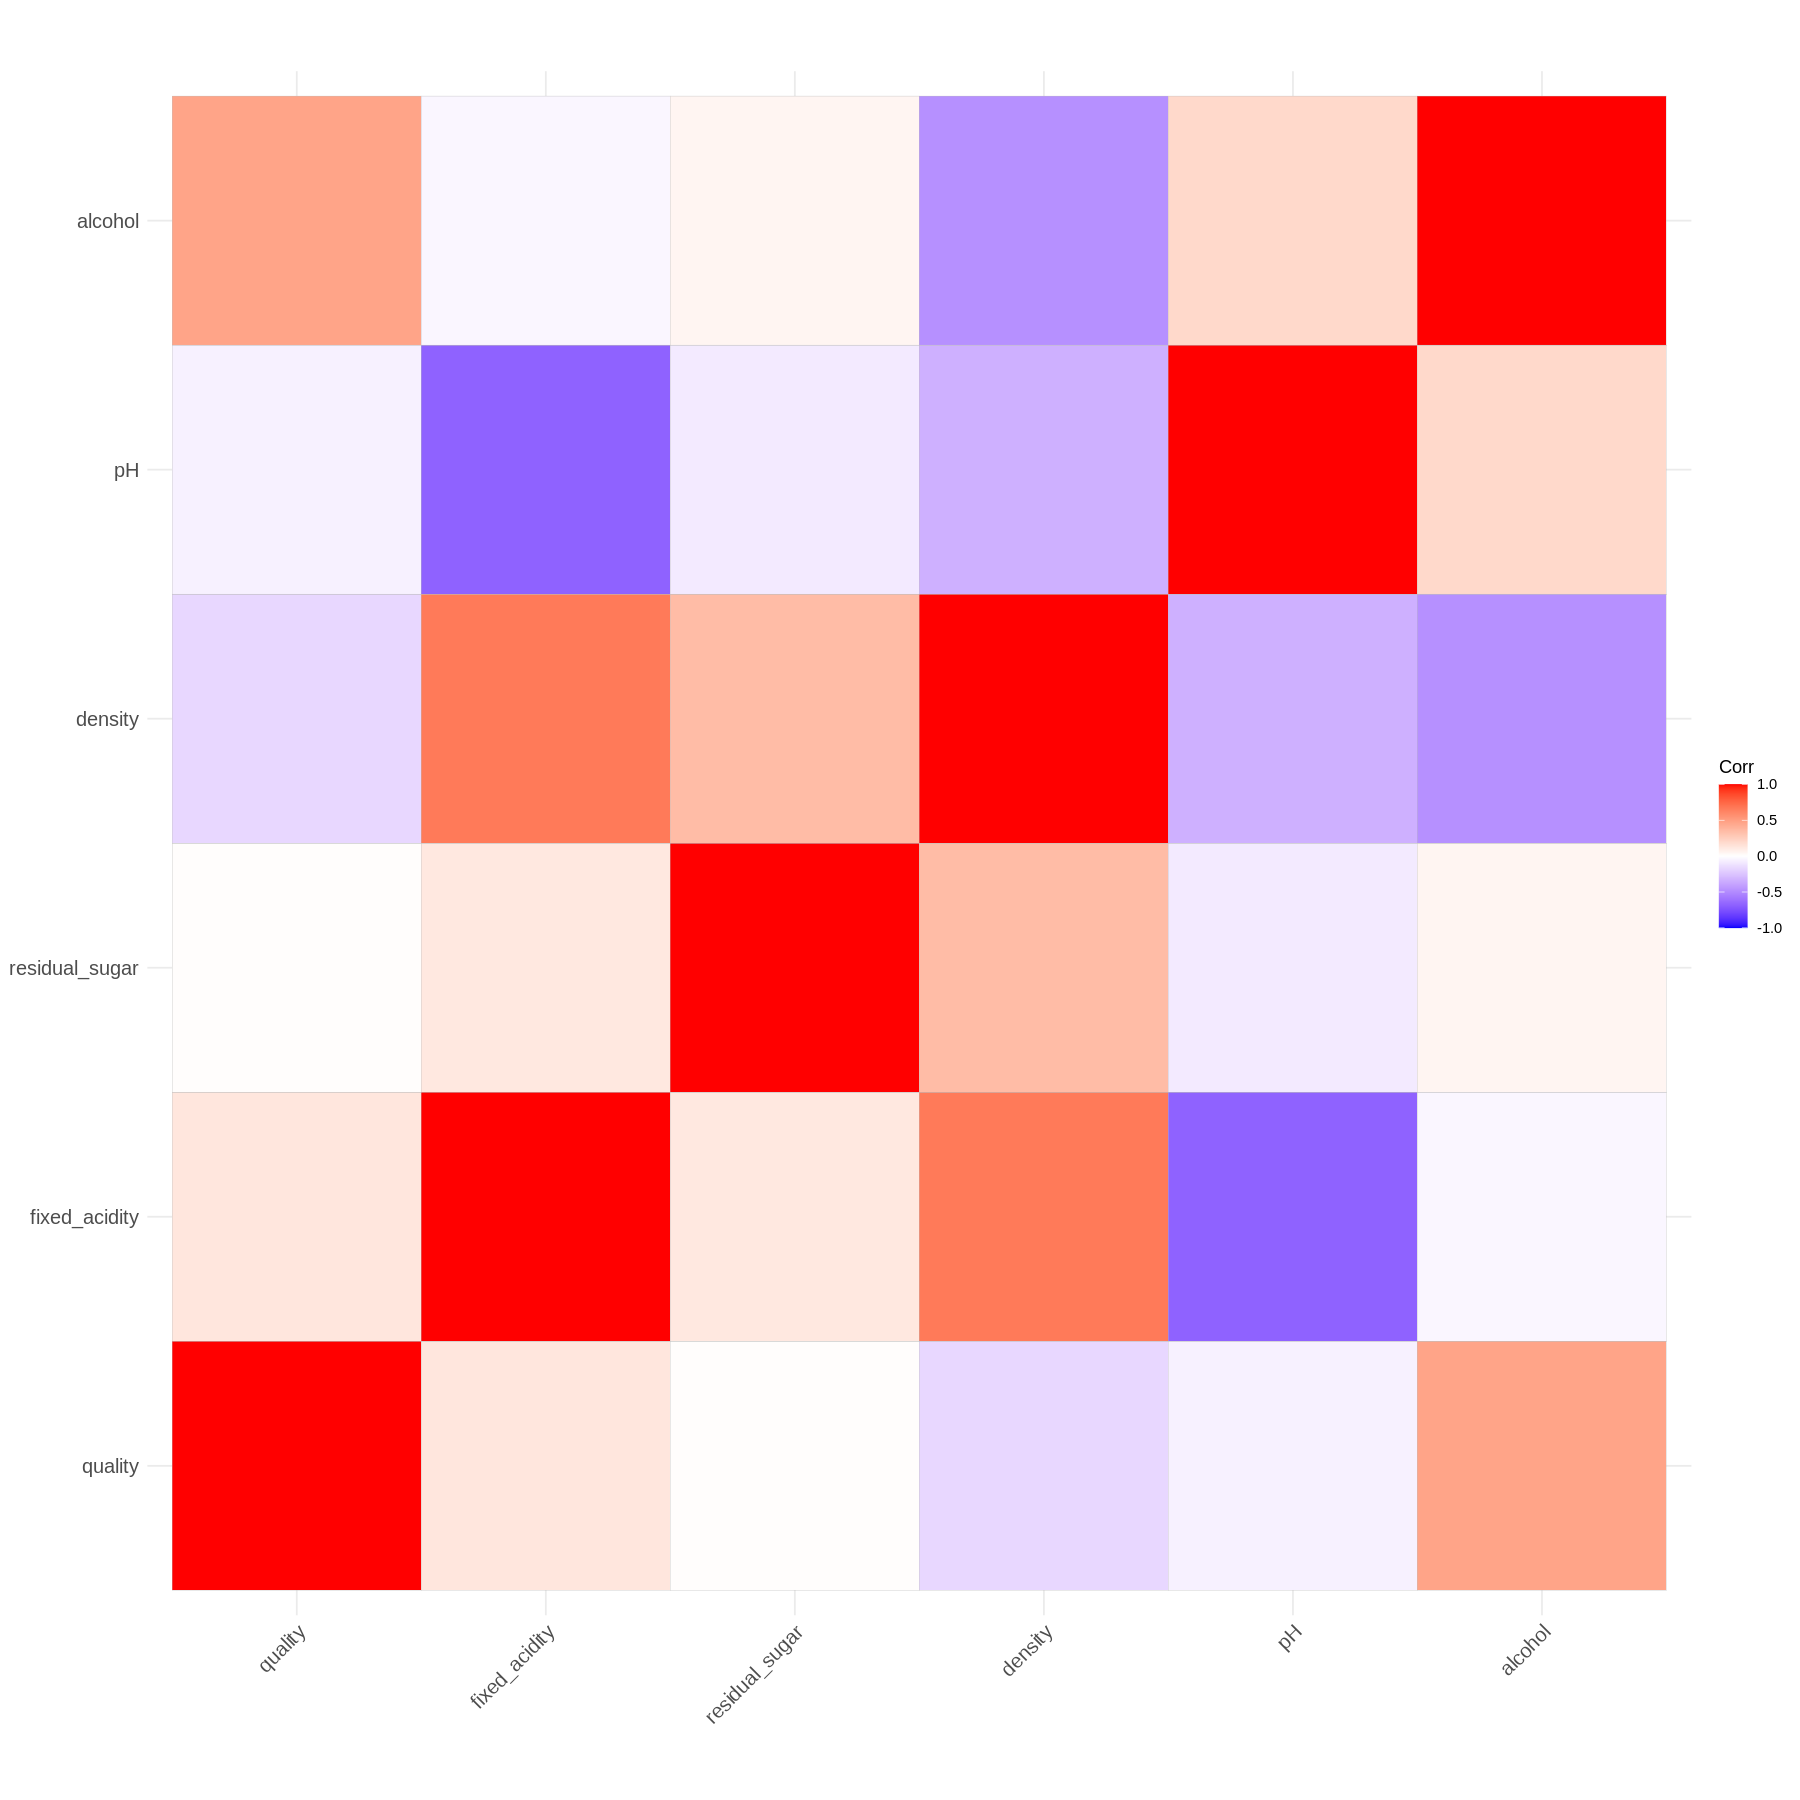

In [81]:
redwine_train <- redwine_train |>
    mutate(quality = as.numeric(quality)) |>
    select(quality, everything())

ggcorrplot(cor(redwine_train))